In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("Path to dataset files:", path)

100%|██████████| 48.5k/48.5k [00:00<00:00, 3.12MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

# List files in the downloaded directory to check the correct file name
print("Files in the downloaded directory:")
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

# Once you identify the correct file name, replace 'student.csv' with it.
# data = pd.read_csv(path + "/student.csv")
# data.head()

Files in the downloaded directory:
/root/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1/Student_Performance.csv


In [ ]:
# Replace 'student.csv' with the correct file name identified in the previous step
data = pd.read_csv(path + "/Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
data.shape

(10000, 6)

In [ ]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
data.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

,Extracurricular Activities
0,1
1,0
2,1
3,1
4,0
...,...
9995,1
9996,1
9997,1
9998,1


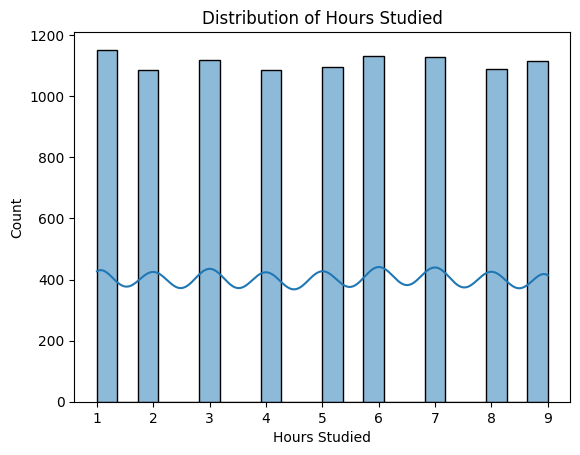

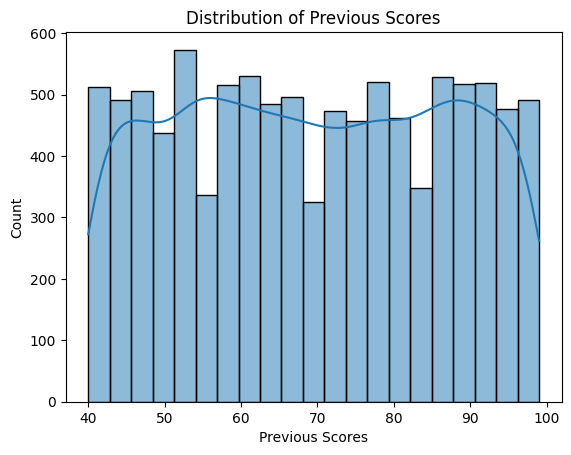

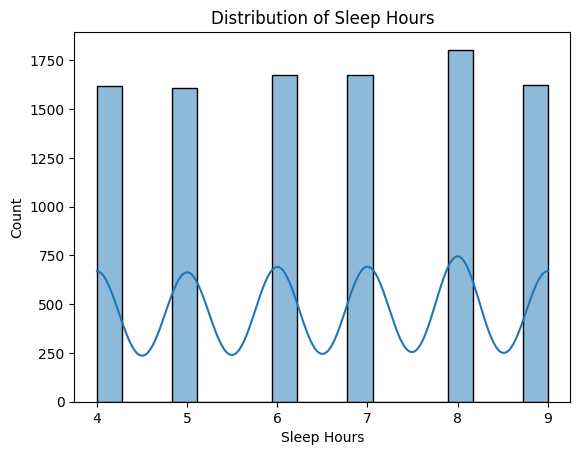

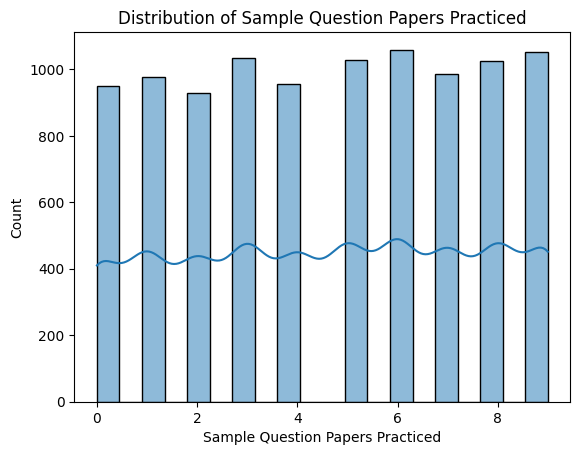

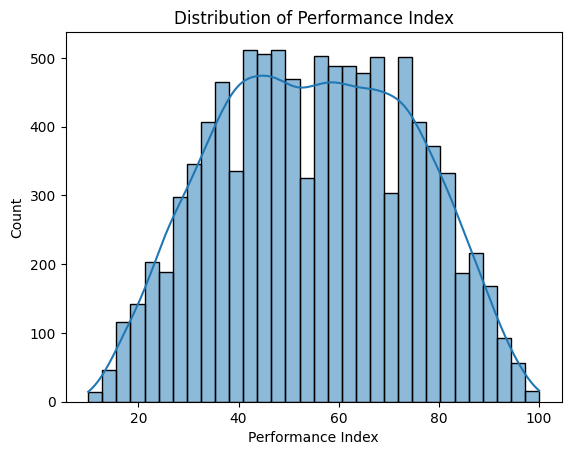

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in data.select_dtypes(include='number').columns:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


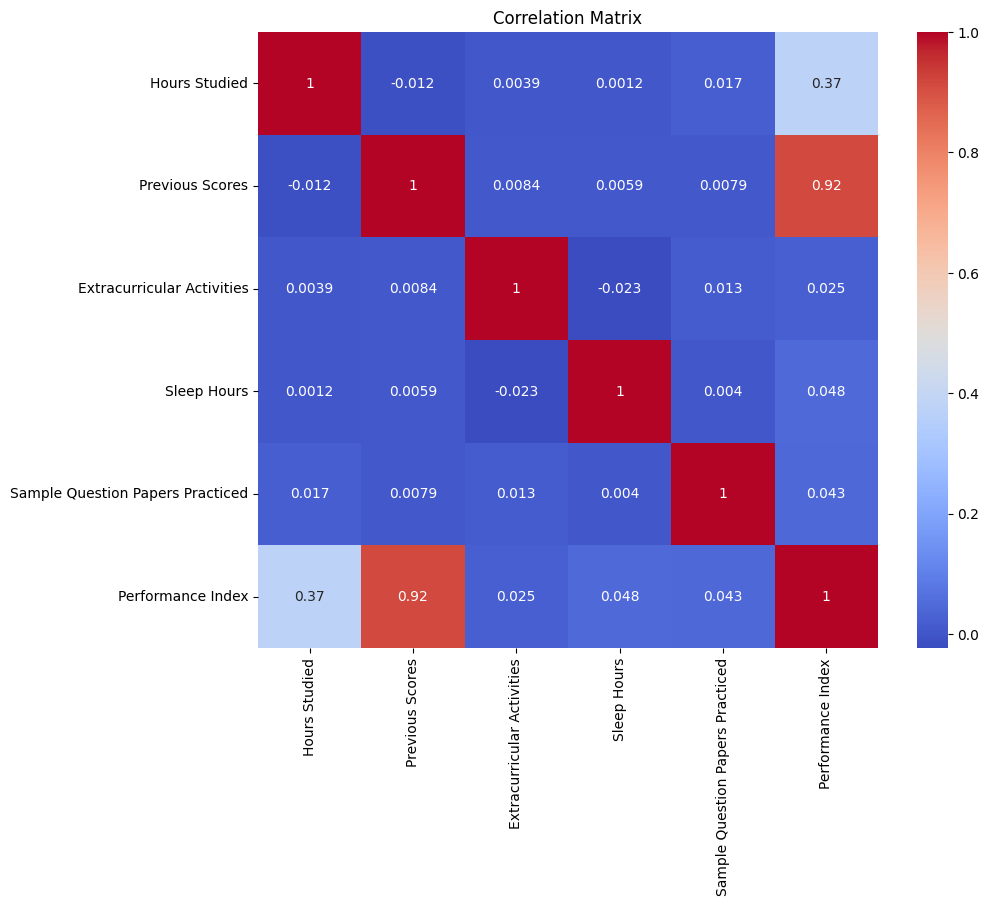

In [ ]:
plt.figure(figsize=(10, 8))

# Convert 'Extracurricular Activities' to numerical values
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = data.drop('Performance Index', axis=1)
y = data['Performance Index']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.9889832909573145
MSE: 4.082628398521853


In [ ]:
# Predict on training set
y_train_pred = model.predict(X_train)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score

print("Training R² Score:", r2_score(y_train, y_train_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))


Training R² Score: 0.9886898790682355
Training MSE: 4.169735849525007


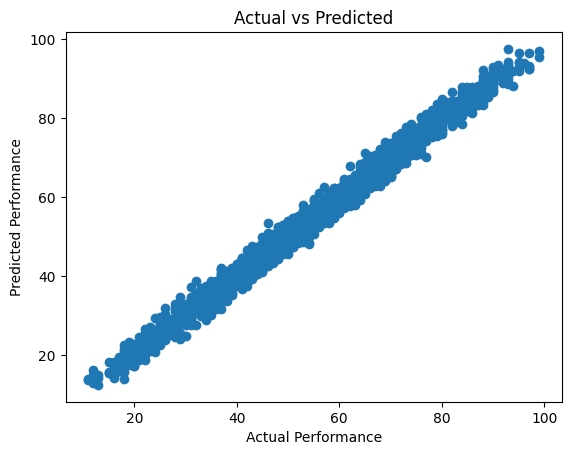

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual vs Predicted")
plt.show()

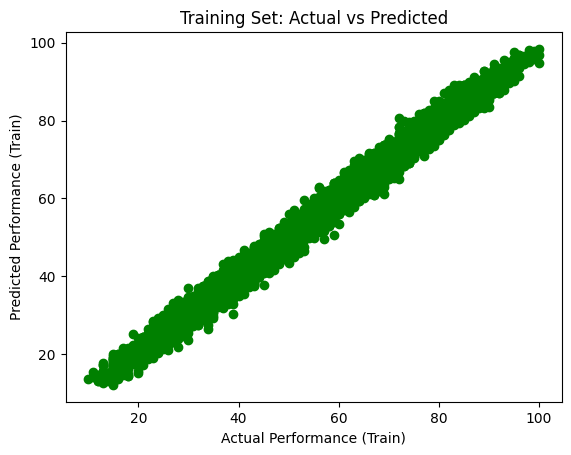

In [ ]:
plt.scatter(y_train, y_train_pred, color='green')
plt.xlabel("Actual Performance (Train)")
plt.ylabel("Predicted Performance (Train)")
plt.title("Training Set: Actual vs Predicted")
plt.show()